In [1]:
import folium
from folium import Marker, Popup
import statistics
from IPython.display import HTML, Image
import json
from nb_utils import get_ld_json, stylized_json
import rdflib
from sparql import FFRDMeta
image = Image(filename='imgs/rascat.png')

# Kanawha / FFRD Metadata Demo

This notebook provides context, overview, and proof of concept for a knowledge graph based system, implemented on the interoperable Resources Description Framework (RDF), to facilitate development of data and products using the [FAIR](https://www.nature.com/articles/sdata201618#:~:text=FAIR%E2%80%94Findable%2C%20Accessible%2C%20Interoperable%2C%20Reusable) principles.


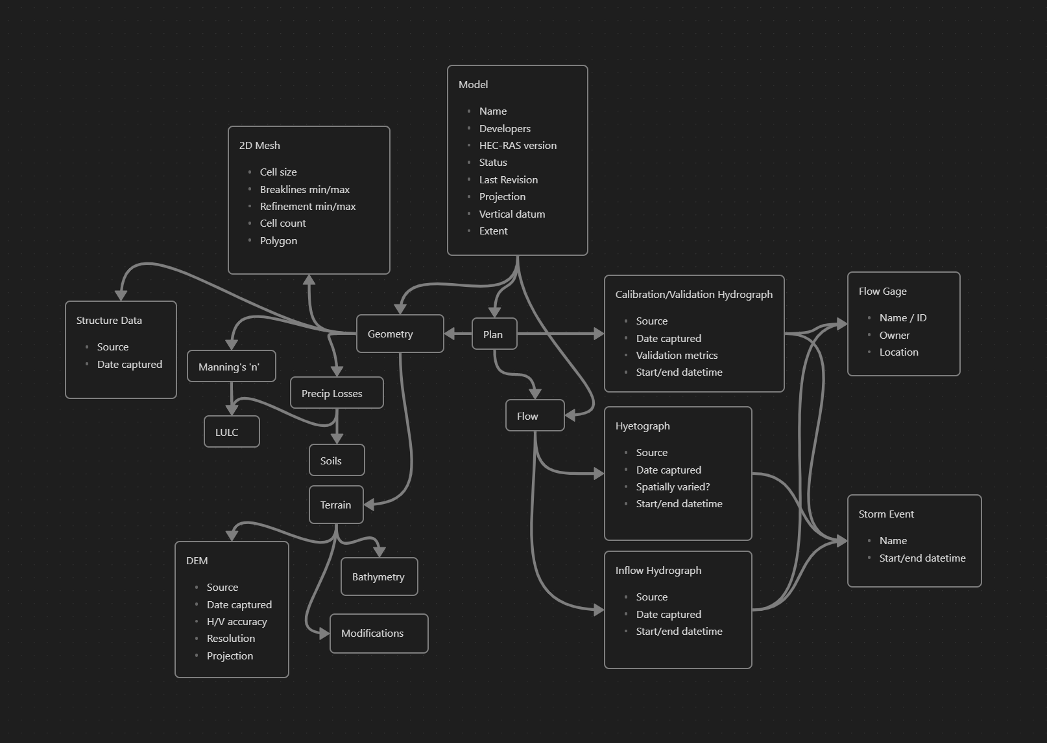

In [2]:
display(image)

## Background

### Knowledge Graphs

A knowledge graph is a type of knowledge representation that captures information as entities and their relationships to each other. It is a structured data model that is used to represent knowledge in a way that can be easily understood by both humans and machines.

In a knowledge graph, information is represented as nodes, which are entities, and edges, which are the relationships between entities. These entities and relationships can be organized into a graph structure, which allows for efficient navigation and querying of the data.

Knowledge graphs are commonly used to represent information in a variety of domains, including but not limited to, scientific research, healthcare, business, and social media. They are often used to support intelligent applications, such as question-answering systems, recommendation engines, and chatbots.

Some examples of knowledge graphs include Google's Knowledge Graph, which powers many of Google's search results, and the Open Biological and Biomedical Ontology (OBO) Foundry, which represents knowledge in the biological and biomedical domains.

### Ontologies / Controlled Vocabularies

Controlled vocabularies in knowledge graphs are sets of standardized terms, concepts, or categories used to describe the entities and relationships within the graph. These vocabularies serve as a common language for data integration, retrieval, and analysis across different domains, applications, and communities.

Controlled vocabularies are typically created and managed by subject matter experts, organizations, or standardization bodies to ensure consistency, accuracy, and interoperability of the data. They may include taxonomies, thesauri, ontologies, or other types of classification schemes that provide explicit definitions, relations, and constraints on the terms and their usage.

In knowledge graphs, controlled vocabularies can be used to model and represent various types of knowledge, such as:

Domain-specific concepts and properties (e.g., medical terms, chemical compounds, financial indicators)
Relationships and dependencies among entities (e.g., part-of, located-in, influenced-by)
Metadata and annotations (e.g., source, author, date, license)
By using controlled vocabularies, knowledge graphs can improve the quality, consistency, and usability of the data, as well as enable more powerful querying, inference, and visualization capabilities. They also facilitate data sharing and integration across different systems and domains, which is particularly important in the context of the Semantic Web and linked data.

### Vocabularies and Namespaces

A namespace is a way of organizing identifiers (such as variable names, function names, or class names) in a program or system to avoid naming conflicts. It provides a unique identifier for each entity to ensure that there are no naming clashes. In other words, a namespace is a container for a set of identifiers that are used to uniquely identify a specific resource or object. In this case, namespaces are customized to specify locations (i.e. in the cloud, on a server) where project/model specific data is located.

On the other hand, an ontology is a formal specification of a shared conceptualization that represents a set of concepts and categories in a particular domain. It defines the relationships among the concepts and categories in a domain, along with their properties and attributes. An ontology provides a common vocabulary and a shared understanding of a domain, enabling systems to communicate with each other and reason about the domain.


*Descriptions (largely) courtesy of ChatGPT*

---

In [3]:
ffrd = FFRDMeta()
g = rdflib.Graph()
g.parse("./kanawha.ttl", format="turtle")

<Graph identifier=N0501d525decc4b379b0a75d5844b0762 (<class 'rdflib.graph.Graph'>)>

#### Vocabularies 
(Used in this notebook)

In [4]:
for item in g.namespaces():
    if item[0] in ffrd.vocabularies:
        ns, ref = item[0], item[1]
        gage_link = f'<b><a  href="{str(ref)}" target="_blank">{str(ns)}</a></b> &nbsp;&nbsp;{str(ref)}'
        display( HTML(gage_link))

#### Namespaces 
(Used in this notebook)

In [5]:
for item in g.namespaces():
    if item[0] in ffrd.namespaces:
        ns, ref = item[0], item[1]
        gage_link = f'<b><a  href="{str(ref)}" target="_blank">{str(ns)}</a></b> &nbsp;&nbsp;{str(ref)}'
        display(HTML(gage_link))

In [6]:
image = Image(filename='imgs/graphdb.png')

### Linked Data Queries

**Through the development of model-centric metadata development, graphs can be traversered from any starting node to any node in the graph.**

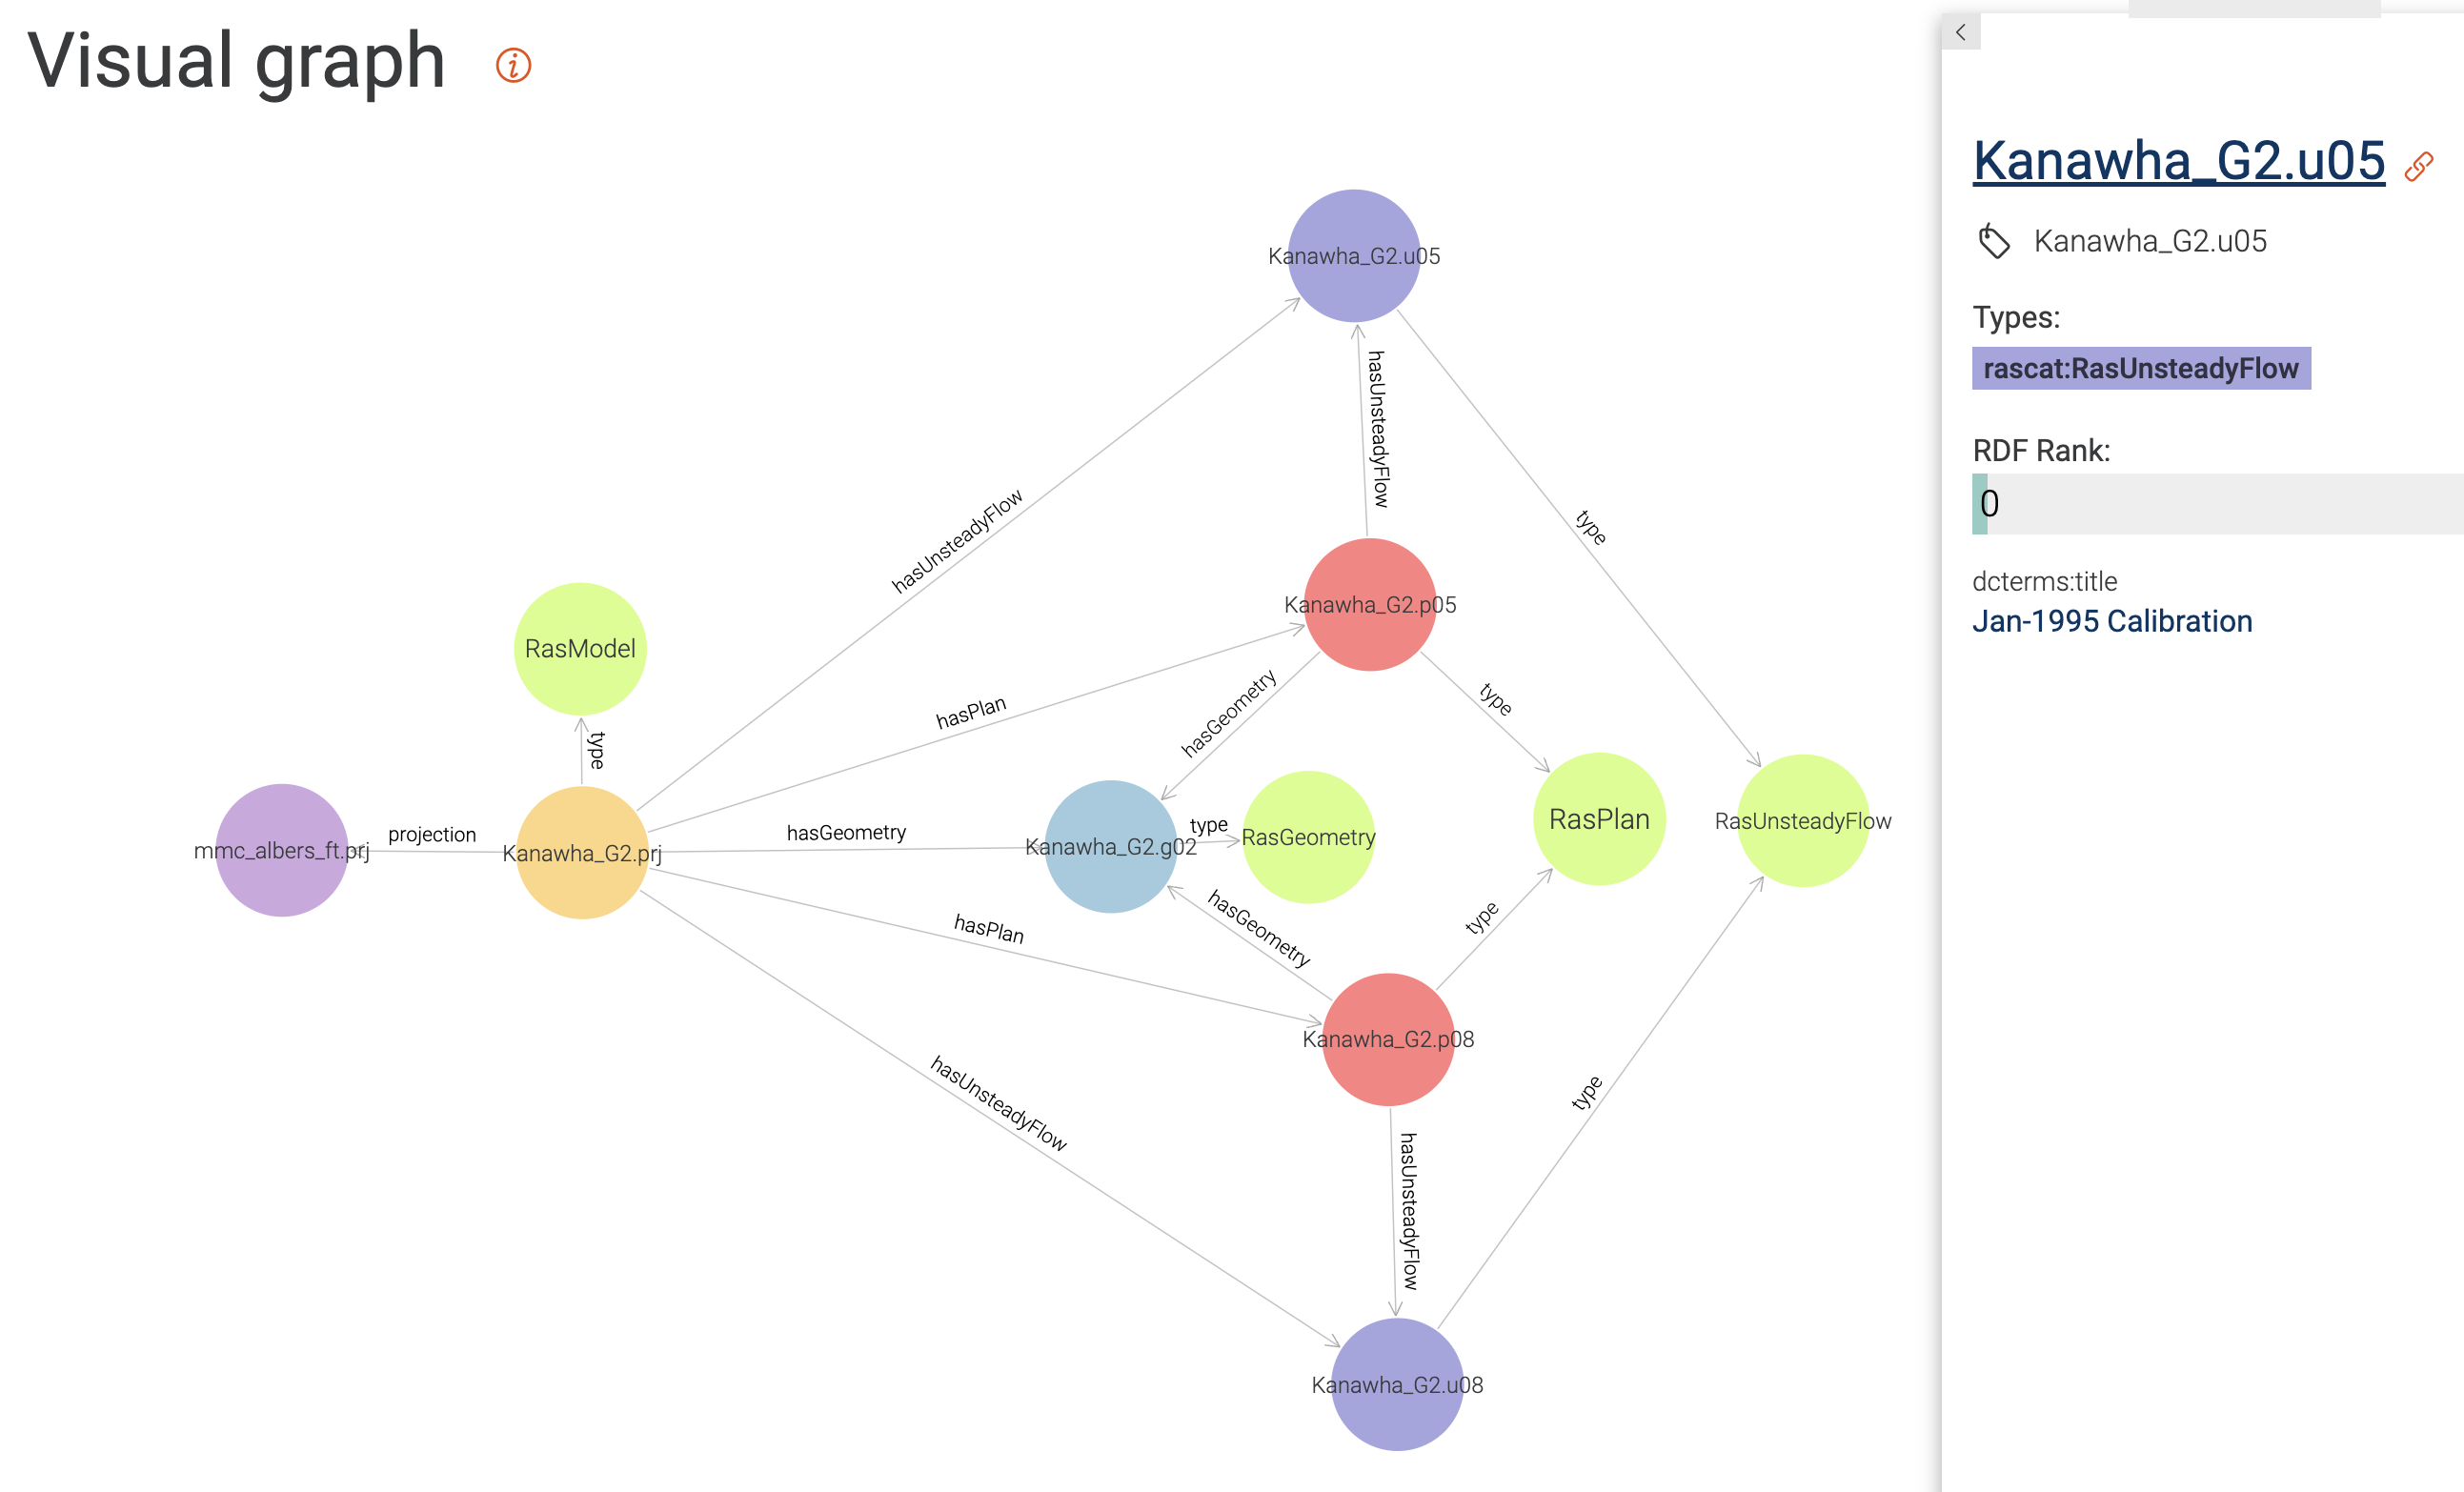

In [7]:
display(image)


**For example, metadata links enable sophisticated (yet simple) queries to connect models with the firm that developed them, calibration events included in model setup and development, simulations in the various plans, etc.** 

**In this example, the Kanawha Metadata can be queried to identify the modeler of record.**

In [8]:
model_creator = "Mark McBroom"

**Results form a *creator query* pulling data from the Kanawha Metadata files:**

In [9]:
models = dict()

for row in g.query(ffrd.query_creator(model_creator)):
    title = row[0]
    description = row[1]
    ras_model_path = row[2]
    models[title] = {"description":description, "model_location":ras_model_path}
    
display(stylized_json(models))

**The query results show three models in the inventory developed by the creator used in the query. Results include description, and path to the model. As data is shipped to the cloud or incorporated in Model Library, these links will take users directly to the model.**

**This search could be expanded to look for models developed by a specific firm or PTS partner:**

In [10]:
org_name = "Freese and Nichols"

In [11]:
projects = dict()

for row in g.query(ffrd.query_org(org_name)):
    title = row[0]
    description = row[1]
    ras_model_path = row[2]
    org_name = row[3]
    jv_name = row[4]
    
    projects[title] = { "PTS":jv_name,"firm":org_name, "description":description, "model_location":ras_model_path}
        
display(stylized_json(projects))

### Model Geometry Queries

**The *rascat* vocabulary incorporates qualitative and quantitative data. The following example searches the inventory of ras models developed for the Kanawha study to identify geometries with large meshes (i.e. high cell counts) and return the path to the file, the cell count, and descriptions of the model.**

In [12]:
cell_count = 400000

In [13]:
large_meshes = dict()

for row in g.query(ffrd.query_cell_count(cell_count)):
    title = row[0]
    description = row[1]
    model = row[2]
    geometry = row[3]
    cell_count = row[4]
    large_meshes[title] = {"geometry":geometry, "description":description, "cell_count":int(cell_count)}

display(stylized_json(large_meshes))

**Note: Metadata checks may also enabled prior to submission or scaling. In the above list of models returned from the query, several models do not include descriptions. Metadata checks put in place prior to scaling (i.e. running 1,000's of probabilistic simulations in the cloud) would identify elements needing completion/additional information, ensuring consistent, quality deliverables.**

### Foundational Data Queries

**There are numerous scenarios in which it may be required to evaluate the foundational data used in the development of models. Examples include topography, presence or absence of hydraulic structures, impervious surface cover to name a few.**

**This example performs a search on the landuse/landcover sources used to develop friction parameters (surface roughness) in models included in the inventory.**


In [14]:
lulc_datasets = {}

for row in g.query(ffrd.query_lulc()):
    lulc_desc = row[0]
    titles = str(row[1]).split(",")
    lulc_datasets[lulc_desc] = [t.strip() for t in titles]
    
display(stylized_json(lulc_datasets))

**Results show that three land cover datasets were shared by multiple models. The metadata could be further queried to identify scripts or processes used to develop the datasets where inclduded.**

###  USGS Gage Queries

**Another application of metadata queries would be the identification of USGS gages included in models. This search identifies the models which include simulations or calibration events at a gage location.**

In [15]:
gage = "03187500"

In [16]:
for row in g.query(ffrd.query_gage(gage)):
    model = row[0]
    print(model)

**Due to the bi-drectional nature of the data in the Kanawha metadata, the inverse approach can be taken: search models to identify the presence of gages in plans.**


In [17]:
model = "New-LittleRiver.prj"

In [18]:
gage_urls = dict()

for row in g.query(ffrd.query_gages(model)):
    model = row[0]
    gage = row[1]
    gageID = row[2]
    gage_link = f'<a href="{str(gage)}">USGS {str(gageID)}</a>'
    gage_urls[gage_link] = str(model)

display(stylized_json(gage_urls))

### Calibration Event Queries

**Models calibrated prior to probabilistic simulations will include additional information useful for QAQC prior to scaling. In this example, a metadata query searches the calibration events in a model and returns the results of the Nash-Sutcliffe Efficiency metric for the top three poorest performing locations.**

In [19]:
calibration_events = dict()

for row in g.query(ffrd.query_calibration(limit=3)):
    title = row[0]
    description = row[1]
    model = row[2]
    flow = row[3]
    gage = row[4]
    nse = row[5]
    flow_title = row[6]
    gage_title = row[7]
    hydro_type = row[8]
    plan = row[9]
    plan_title = row[10]
    if calibration_events.get(str(title)) is None:
        calibration_events[str(title)] = dict()

    calibration_events[str(title)][gage_title] = {"plan":plan_title, "Nash-Sutcliffe Efficiency score": nse,
                                                  "observation":hydro_type,"gage_link":gage}
    
display(stylized_json(calibration_events))

In [20]:
model = "New-LittleRiver.prj"
gage_urls = []

for row in g.query(ffrd.query_gages(model)):
    model = row[0]
    gage = row[1]
    gage_urls.append(gage)
    gageID = row[2]
#     print(model, gage, gageID)

gage_ld_jsons = []
for gage_url in gage_urls:
    gage_ld_jsons.append(get_ld_json(gage_url))

### Geospatial Queries

**Geospatial search and discovery is enabled through linked data provided by the *rascat* ontology using the same approach as the USGS for gage locations. A linked data search of the USGS gages identified in the Kanawha metadata can be used to fetch information from the USGS gage website directly, as shown in the map below.**

In [21]:
center_lat = statistics.mean([float(i['geo']['latitude']) for i in gage_ld_jsons])
center_lng = statistics.mean([float(i['geo']['longitude']) for i in gage_ld_jsons])

center = (center_lat, center_lng)

m = folium.Map(location=center, zoom_start=9)

for j in gage_ld_jsons:
    location = [float(j['geo']['latitude']), float(j['geo']['longitude'])]
    name = j['name']
    description = j['description']
    gage_url = j['@id']
    popup_content = f"""<h3>{name}</h3><p>Calibration Gage <b>{model}</b></p><p>{description}</p><p><a target="_blank" rel="noopener noreferrer" href="{gage_url}">{gage_url}</a></p>"""
    popup = Popup(popup_content, max_width=2650)
    marker = Marker(location=location, draggable=False, title=name, popup=popup)
    m.add_child(marker)
m

### Linked Data and the USGS

**As shown in the json below, the use of linked data enables interoperability and data exchange seamlessly between FEMA models and USGS observations.**

In [22]:
display(stylized_json(gage_ld_jsons))

# End